In [1]:
import numpy as mp
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

### Time resampling

In [2]:
df = pd.read_csv('../Data/starbucks.csv')

In [3]:
df.head()

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340
3,2015-01-07,37.8848,9732554
4,2015-01-08,38.4961,13170548


In [4]:
df = pd.read_csv('../Data/starbucks.csv',parse_dates=True,index_col='Date')

In [5]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
Close     1006 non-null float64
Volume    1006 non-null int64
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


In [7]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [8]:
df.resample(rule='A')

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

In [9]:
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [10]:
def first_day (entry):
    if len(entry):
        return entry[0]

In [11]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [12]:
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
2015-01-09,37.2361,27556706
2015-01-12,37.4415,10021486
2015-01-13,37.7401,11040702
2015-01-14,37.5301,9295084


In [13]:
df['Close'].resample(rule='A').mean()

Date
2015-12-31    50.078100
2016-12-31    53.891732
2017-12-31    55.457310
2018-12-31    56.870005
Freq: A-DEC, Name: Close, dtype: float64

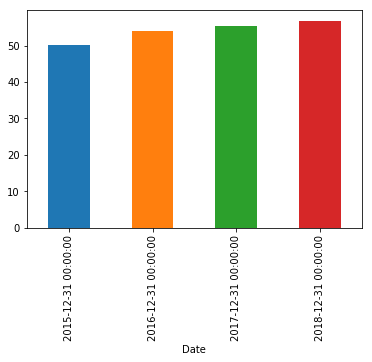

In [14]:
df['Close'].resample(rule='A').mean().plot.bar()

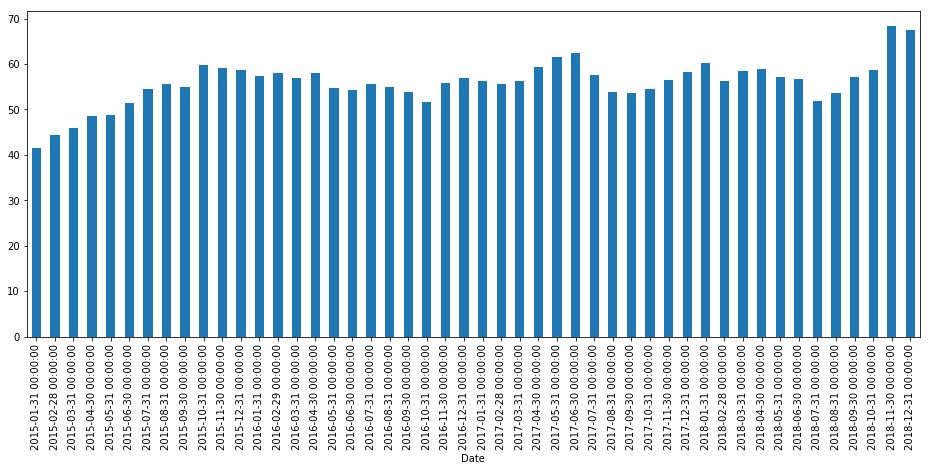

In [15]:
df['Close'].resample(rule='M').max().plot.bar(figsize=(16,6),color='#1f77b4');

### Time shifting

In [16]:
df = pd.read_csv('../Data/starbucks.csv',parse_dates=True,index_col='Date')
print(df.head())
print(df.tail())

              Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548
            Close    Volume
Date                       
2018-12-24  60.56   6323252
2018-12-26  63.08  16646238
2018-12-27  63.20  11308081
2018-12-28  63.39   7712127
2018-12-31  64.40   7690183


In [17]:
df.shift(periods=1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
2015-01-09,38.4961,13170548.0
2015-01-12,37.2361,27556706.0
2015-01-13,37.4415,10021486.0
2015-01-14,37.7401,11040702.0


In [18]:
df.shift(periods=5)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,38.0061,6906098.0
2015-01-12,37.2781,11623796.0
2015-01-13,36.9748,7664340.0
2015-01-14,37.8848,9732554.0


In [19]:
df.shift(periods=-5)

,Close,Volume
Date,,
2015-01-02,37.2361,27556706.0
2015-01-05,37.4415,10021486.0
2015-01-06,37.7401,11040702.0
2015-01-07,37.5301,9295084.0
2015-01-08,37.1381,8126602.0
2015-01-09,37.6188,9015502.0
2015-01-12,37.9058,10738304.0
2015-01-13,37.9361,10844182.0
2015-01-14,38.6128,23913056.0


In [20]:
df.shift(periods=1,freq='M')

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
2015-01-31,37.2361,27556706
2015-01-31,37.4415,10021486
2015-01-31,37.7401,11040702
2015-01-31,37.5301,9295084


### Rolling and Expanding

In [21]:
print(df.head())

              Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548


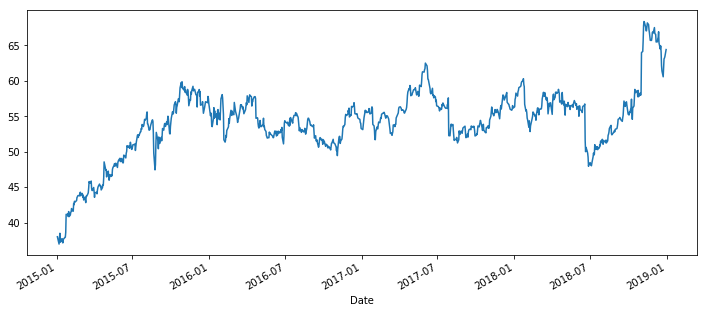

In [22]:
df['Close'].plot(figsize=(12,5))

In [23]:
df.rolling(window=7).mean()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


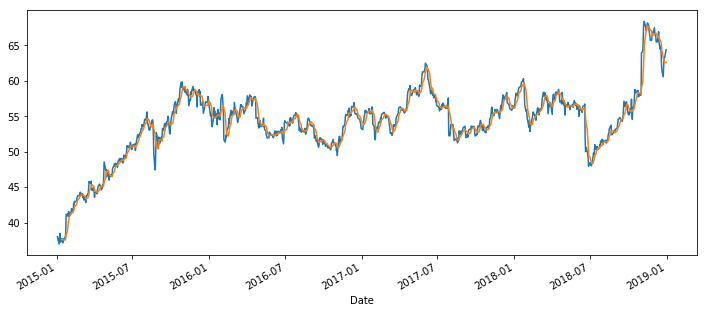

In [24]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=7).mean()['Close'].plot(figsize=(12,5))

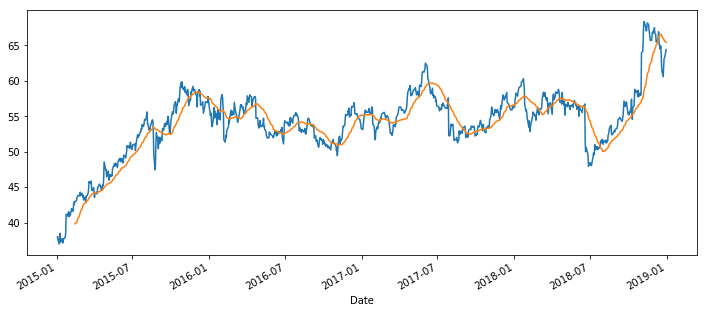

In [25]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=30).mean()['Close'].plot(figsize=(12,5))

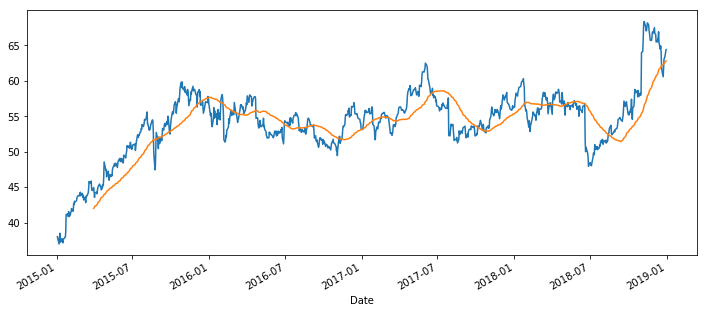

In [26]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=60).mean()['Close'].plot(figsize=(12,5))

In [27]:
df['Close: 30 day mean'] = df['Close'].rolling(window=30).mean()

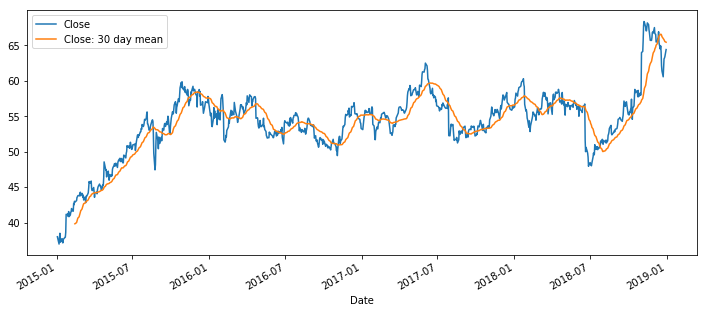

In [28]:
df[['Close', 'Close: 30 day mean']].plot(figsize=(12,5))

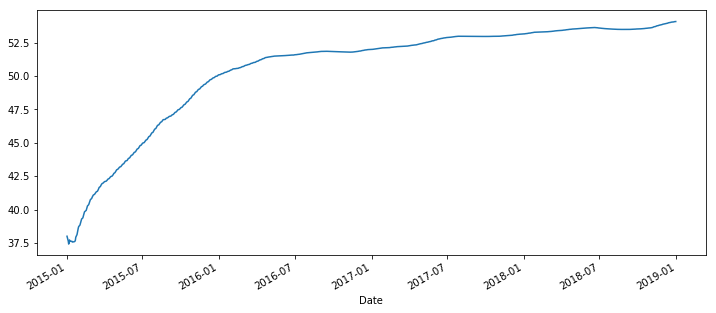

In [29]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(12,5))

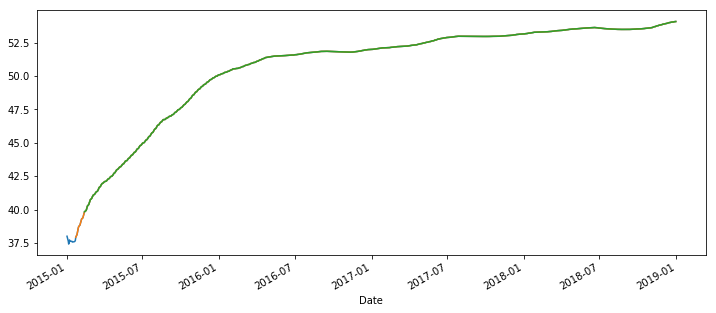

In [30]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(12,5))
df['Close'].expanding(min_periods=15).mean().plot(figsize=(12,5))
df['Close'].expanding(min_periods=30).mean().plot(figsize=(12,5))